## EfficientNetB0
### Database: [Plant Diseases Training Dataset](https://www.kaggle.com/datasets/nirmalsankalana/plant-diseases-training-dataset/data)

In [1]:
#Import nessesary packages, libraries and global variables

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  PIL import Image
import numpy as np
from tensorflow.keras import Input, Model
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import split_dataset
import tensorflow as tf
from tensorflow import keras

RSEED = 42
dataset_path = '../data/train/'

In [16]:
#from ..loard_split_preprocess_function.py import load_preprocess_split_train_val
#train_data, val_data = load_preprocess_split_train_val(dataset_path)



ImportError: attempted relative import with no known parent package

In [2]:
#getting impatient

def load_preprocess_split_train_val(data_path):
    ''' 
    Function needs filefath as parameter, it will create a validation dataset of 20% of the total df, 
    Needs an RSEED as global variable,
    Image will be cropped to 1:1 and altered to 224 x 224
    '''
    image = tf.keras.utils.image_dataset_from_directory(
        data_path, 
        validation_split = 0.2,
        subset = "both", 
        seed = RSEED,
        image_size = (224, 224),
        crop_to_aspect_ratio = True,
        label_mode = 'categorical'
    )
    return image 

In [3]:
train_ds, val_ds = load_preprocess_split_train_val(dataset_path)

Found 76697 files belonging to 39 classes.
Using 61358 files for training.
Using 15339 files for validation.


In [4]:
#check an example 
val_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 39), dtype=tf.float32, name=None))>

In [5]:
#define model

model = keras.applications.EfficientNetB0(
    include_top=False
)

In [6]:
#get overview of the model architecture

model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [7]:
inputs = Input(shape = (224, 224, 3))

base = model(inputs)

flatten = GlobalAveragePooling2D()(base)


outputs = Dense(39, activation='softmax')(flatten)

model_enB0 = Model(inputs,outputs)

In [8]:
model_enB0.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
from keras import layers
IMG_SIZE = 224
BATCH_SIZE = 32

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [12]:
model = build_model(num_classes=39)

epochs = 25  # @param {type: "slider", min:8, max:80}
hist = model.fit(train_ds, epochs=epochs, validation_data=val_ds)


Epoch 1/25
1918/1918 [==============================] - 970s 504ms/step - loss: 0.9151 - accuracy: 0.7853 - val_loss: 0.4543 - val_accuracy: 0.8658
Epoch 2/25
1918/1918 [==============================] - 1055s 550ms/step - loss: 0.6118 - accuracy: 0.8199 - val_loss: 0.4681 - val_accuracy: 0.8614
Epoch 3/25
1918/1918 [==============================] - 4551s 2s/step - loss: 0.6579 - accuracy: 0.8159 - val_loss: 0.5438 - val_accuracy: 0.8456
Epoch 4/25
1918/1918 [==============================] - 947s 494ms/step - loss: 0.6834 - accuracy: 0.8159 - val_loss: 0.6087 - val_accuracy: 0.8596
Epoch 5/25
1918/1918 [==============================] - 2194s 1s/step - loss: 0.6937 - accuracy: 0.8176 - val_loss: 0.5516 - val_accuracy: 0.8493
Epoch 6/25
1918/1918 [==============================] - 2137s 1s/step - loss: 0.7030 - accuracy: 0.8209 - val_loss: 0.5055 - val_accuracy: 0.8647
Epoch 7/25
1918/1918 [==============================] - 3921s 2s/step - loss: 0.7105 - accuracy: 0.8231 - val_loss: 0

NameError: name 'plot_hist' is not defined

In [13]:


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

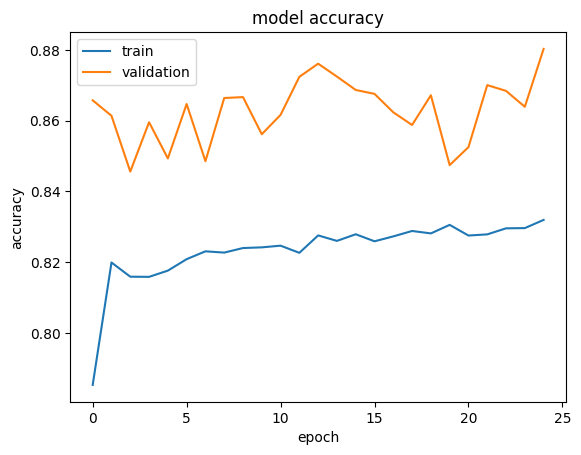

In [14]:
plot_hist(hist)

In [ ]:
dataset_test_path = '../data/test/'